In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2.1743061286997554


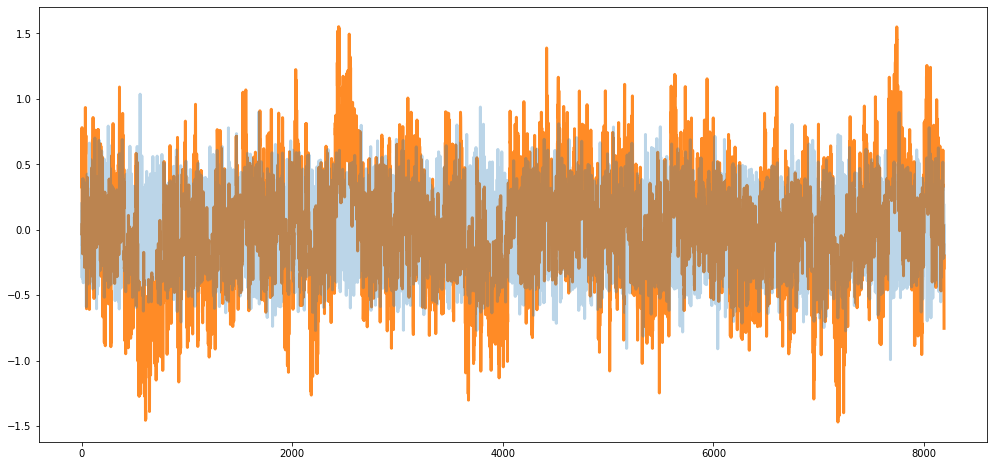

In [5]:

    def apply_pink_noise(x, A, snr, num_sources):
    nrows = len(x)
    ncols = num_sources

    noise = np.full((nrows, ncols), np.nan)
    noise[0, :] = np.random.random(ncols)
    noise[:, 0] = np.random.random(nrows)

    cols = np.random.geometric(0.5, nrows)
    cols[cols >= ncols] = 0
    rows = np.random.randint(nrows, size=nrows) 
    noise[rows, cols] = np.random.random(nrows)
    
    noise_save = noise.copy()
    idx = np.isnan(noise_save)
    noise_save[idx] = 0

    noise = pd.DataFrame(noise)
    noise.fillna(method='ffill', axis=0, inplace=True)
    noise = noise.iloc[:, :]
    noise = noise.sum(axis=1).to_numpy()
    noise2 = (noise - noise.mean())
    noise_abs = np.absolute(noise)
    A = np.array([1, 1])
    snr = 1
    print(np.percentile(noise_save.sum(axis=1), 97.5))
    noise2 = (A.mean()/snr) * noise2 / 2
    return noise2, noise_save.sum(axis=1)

def compute_white_noise(x, A, snr):
    A = np.array([1, 1])
    snr = 1
    stddev = A.mean() / snr / 4 # 95.45% of noise will be within snr
    noise = np.random.normal(0, stddev, len(x))
    return noise, stddev


x1, s = compute_white_noise(np.ones(8192), np.array([100, 200, 100, 200]), 2)
x2, x0 = apply_pink_noise(x1, 150, 2, 10)

plt.figure(figsize=(17,8))
plt.plot(x1, zorder=2, linewidth=3, alpha=0.3)
plt.plot(x2, zorder=1, linewidth=3, alpha=0.9)